In [11]:
import sys
from itertools import product
from os import listdir
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [12]:
param_file = 'ihart_LCR_ind_pass_nodel_params.json'
famgen_file = '../split_gen_ihart/chr.1.famgen.counts.txt'

In [13]:
with open(param_file, 'r') as f:
    params = json.load(f)

sample_ids = []
error_rates = []

errors = list(product(['0/0', '0/1', '1/1', './.'], ['0/0', '0/1', '1/1']))
for k, v in params.items():
    if isinstance(v, dict):
        sample_ids.append(k.split('.')[-1])
        error_rates.append([params[k]["-log10(P[obs=%s|true_gen=%s])" % (obs, true_gen)] for obs, true_gen in errors])

error_rates = np.array(error_rates)

In [14]:
parents, children = set(), set()
famsizes = defaultdict(set)
with open(famgen_file, 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        inds = pieces[1].split('.')
        parents.update(inds[:2])
        children.update(inds[2:])
        famsizes[len(inds)].update(inds)

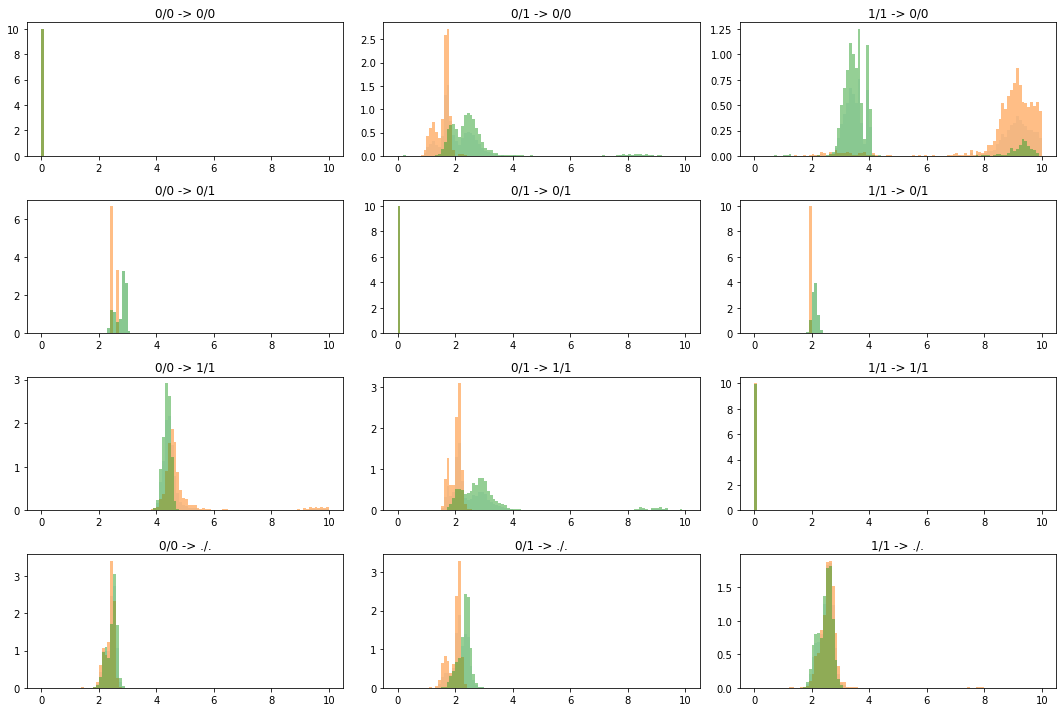

In [15]:
plt.figure(figsize=(15, 10))

for i, error in enumerate(errors):
    plt.subplot(4, 3, i+1)
    plt.title('%s -> %s' % (error[1], error[0]))
    bins = np.arange(0, 10.1, 0.1)
    plt.hist(error_rates[:, i], bins=bins, alpha=0.1, density=True)
    plt.hist(error_rates[[x in parents for x in sample_ids], i], bins=bins, alpha=0.5, density=True)
    plt.hist(error_rates[[x in children for x in sample_ids], i], bins=bins, alpha=0.5, density=True)

plt.tight_layout()
plt.show()

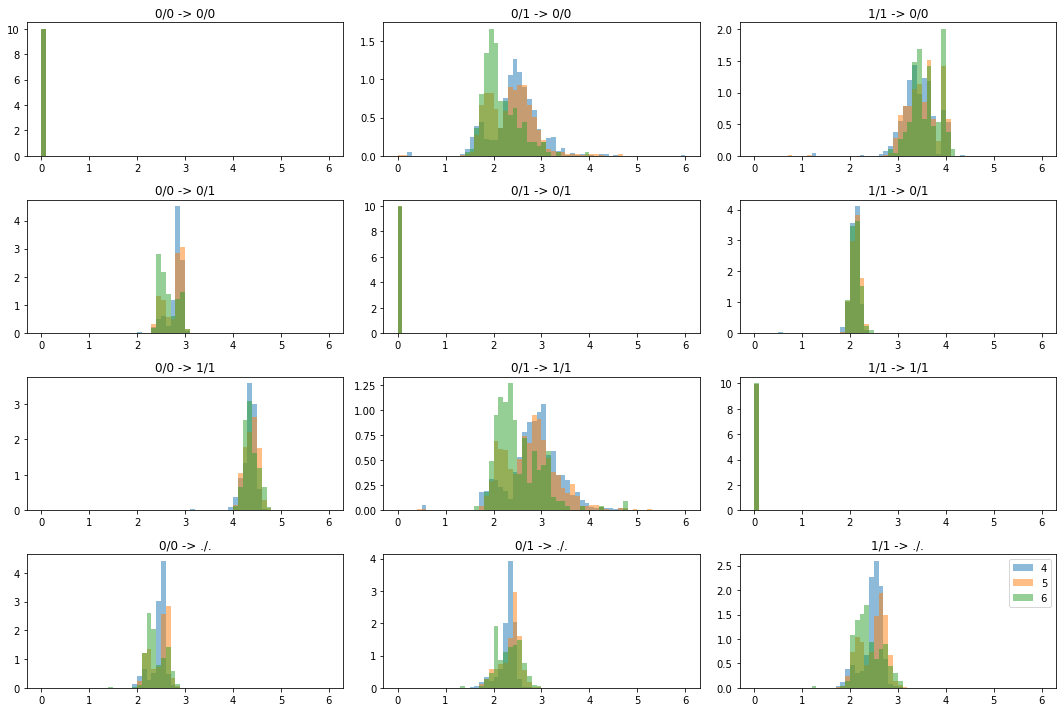

In [21]:
plt.figure(figsize=(15, 10))

for i, error in enumerate(errors):
    plt.subplot(4, 3, i+1)
    plt.title('%s -> %s' % (error[1], error[0]))
    bins = np.arange(0, 6.1, 0.1)
    #plt.hist(error_rates[:, i], bins=bins, alpha=0.1, density=True)
    #plt.hist(error_rates[[x in famsizes[3] and x in children for x in sample_ids], i], bins=bins, 
    #         alpha=0.5, density=True, label='3')
    plt.hist(error_rates[[x in famsizes[4] and x in children for x in sample_ids], i], bins=bins, 
             alpha=0.5, density=True, label='4')
    plt.hist(error_rates[[x in famsizes[5] and x in children for x in sample_ids], i], bins=bins, 
             alpha=0.5, density=True, label='5')
    plt.hist(error_rates[[x in famsizes[6] and x in children for x in sample_ids], i], bins=bins, 
             alpha=0.5, density=True, label='6')
    
plt.legend()
plt.tight_layout()
plt.show()